<a href="https://colab.research.google.com/github/Elsacred02/assignment_4_advanced_machine_learning/blob/main/Assignment4_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras import layers

import matplotlib.pyplot as plt

keras.utils.set_random_seed(42)

In [16]:
path = 'moby_dick.txt'
with open(path, encoding='utf-8') as f:
  text = f.read().lower()
print('Text length:', len(text))
print()
print(text[0:1000])

Text length: 1191786

chapter 1. loomings.

call me ishmael. some years ago—never mind how long precisely—having
little or no money in my purse, and nothing particular to interest me
on shore, i thought i would sail about a little and see the watery part
of the world. it is a way i have of driving off the spleen and
regulating the circulation. whenever i find myself growing grim about
the mouth; whenever it is a damp, drizzly november in my soul; whenever
i find myself involuntarily pausing before coffin warehouses, and
bringing up the rear of every funeral i meet; and especially whenever
my hypos get such an upper hand of me, that it requires a strong moral
principle to prevent me from deliberately stepping into the street, and
methodically knocking people’s hats off—then, i account it high time to
get to sea as soon as i can. this is my substitute for pistol and ball.
with a philosophical flourish cato throws himself upon his sword; i
quietly take to the ship. there is nothing surpri

In [17]:
chars = sorted(list(set(text)))

print('total chars:', len(chars))

#from chars to numbers
char_indices = dict((c, i) for i, c in enumerate(chars))
# from numbert to chars
indices_char = dict((i, c) for i, c in enumerate(chars))

print(char_indices)
print(indices_char)



total chars: 64
{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, '(': 5, ')': 6, '*': 7, ',': 8, '-': 9, '.': 10, '0': 11, '1': 12, '2': 13, '3': 14, '4': 15, '5': 16, '6': 17, '7': 18, '8': 19, '9': 20, ':': 21, ';': 22, '?': 23, '[': 24, ']': 25, '_': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52, '£': 53, 'â': 54, 'æ': 55, 'è': 56, 'é': 57, 'œ': 58, '—': 59, '‘': 60, '’': 61, '“': 62, '”': 63}
{0: '\n', 1: ' ', 2: '!', 3: '$', 4: '&', 5: '(', 6: ')', 7: '*', 8: ',', 9: '-', 10: '.', 11: '0', 12: '1', 13: '2', 14: '3', 15: '4', 16: '5', 17: '6', 18: '7', 19: '8', 20: '9', 21: ':', 22: ';', 23: '?', 24: '[', 25: ']', 26: '_', 27: 'a', 28: 'b', 29: 'c', 30: 'd', 31: 'e', 32: 'f', 33: 'g', 34: 'h', 35: 'i', 36: 'j', 37: 'k', 38: 'l', 39: 'm', 40: 'n', 41: 'o', 42: 'p', 43: 'q', 44: 'r', 45: 's', 46: 't', 4

In [18]:
maxlen = 30
step = 2

sentences = []
next_chars = []

for i in range(0, 200000, step):
  sentences.append(text[i: i + maxlen])
  next_chars.append(text[i + maxlen])

print('number of sentences:', len(sentences))

print(sentences[11])
print(next_chars[11])

number of sentences: 100000
call me ishmael. some years ag
o


In [19]:
x_train = np.zeros((len(sentences), maxlen, len(chars))) # 100,000 x 30 x 64
y_train = np.zeros((len(sentences), len(chars))) # 100,000 x 64

for i, (sentence, next_char) in enumerate(zip(sentences, next_chars)):
  for t, char in enumerate(sentence):
    x_train[i, t, char_indices[char]] = 1
  y_train[i, char_indices[next_char]] = 1

print(x_train.shape)
print(y_train.shape)

(100000, 30, 64)
(100000, 64)


In [20]:
sentences = []
next_chars = []

for i in range(200000, 300000, step):
  sentences.append(text[i: i + maxlen])
  next_chars.append(text[i + maxlen])

print('number of sentences:', len(sentences))

print(sentences[11])
print(next_chars[11])

number of sentences: 50000
 it was startling to see this 
e


In [21]:
x_val = np.zeros((len(sentences), maxlen, len(chars))) # 100,000 x 30 x 64
y_val = np.zeros((len(sentences), len(chars))) # 100,000 x 46

for i, (sentence, next_char) in enumerate(zip(sentences, next_chars)):
  for t, char in enumerate(sentence):
    x_val[i, t, char_indices[char]] = 1
  y_val[i, char_indices[next_char]] = 1

print(x_val.shape)
print(y_val.shape)

(50000, 30, 64)
(50000, 64)


In [22]:
sentences = []
next_chars = []

for i in range(300000, 400000, step):
  sentences.append(text[i: i + maxlen])
  next_chars.append(text[i + maxlen])

print('number of sentences:', len(sentences))

print(sentences[11])
print(next_chars[11])

number of sentences: 50000
ong period of a southern whali
n


In [23]:
x_test = np.zeros((len(sentences), maxlen, len(chars))) # 100,000 x 30 x 64
y_test = np.zeros((len(sentences), len(chars))) # 100,000 x 64

for i, (sentence, next_char) in enumerate(zip(sentences, next_chars)):
  for t, char in enumerate(sentence):
    x_test[i, t, char_indices[char]] = 1
  y_test[i, char_indices[next_char]] = 1

print(x_test.shape)
print(y_test.shape)

(50000, 30, 64)
(50000, 64)


In [24]:
model = keras.Sequential([
    keras.Input(shape = (maxlen, len(chars))),
    layers.LSTM(128),
    layers.Dropout(0.5),
    layers.Dense(len(chars), activation="softmax"),
])

optimizer = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,072 (418.25 KB)

 Trainable params: 107,072 (418.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from keras.callbacks import LambdaCallback
import sys

def testAfterEpoch(epoch, _):
  if epoch < 5:
    return
  print()
  print()
  print('----- Generating text after Epoch: %d' % epoch)

  start_index = random.randint(0, len(text)-maxlen-1)

  generated = ''
  sentence = text[start_index: start_index + maxlen]
  generated += sentence
  print('**** starting sentence*****')
  print(sentence)
  print('***************************')
  sys.stdout.write(generated)

  for i in range(100):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(sentence):
      x_pred[0, t, char_indices[char]] = 1
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.argmax(preds)
    next_char = indices_char[next_index]

    sentence = sentence[1:] + next_char
    sys.stdout.write(next_char)
    sys.stdout.flush()
  print()

print_callback = LambdaCallback(on_epoch_end=testAfterEpoch)

In [26]:
history = model.fit(x_train, y_train,
          validation_data = (x_val, y_val),
          batch_size=2048,
          epochs=10,
          callbacks = [print_callback])

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.1508 - loss: 3.2301 - val_accuracy: 0.2865 - val_loss: 2.5463
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.2919 - loss: 2.5041 - val_accuracy: 0.3366 - val_loss: 2.2940
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.3378 - loss: 2.3024 - val_accuracy: 0.3672 - val_loss: 2.1775
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3652 - loss: 2.1887 - val_accuracy: 0.3846 - val_loss: 2.1014
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.3828 - loss: 2.1130 - val_accuracy: 0.3983 - val_loss: 2.0439
Epoch 6/10
47/49 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3986 - loss: 2.0508

----- Generating text after Epoch: 5
**** starting sentence*****
ttom.
nor in the solitary and 
***************************
ttom.
nor in the solitary and the sare the sare the sare the sare the sare the sare the sare the sare the sare the sare the sare t
49/49 ━━━━━━━━━━━━━━━━━━

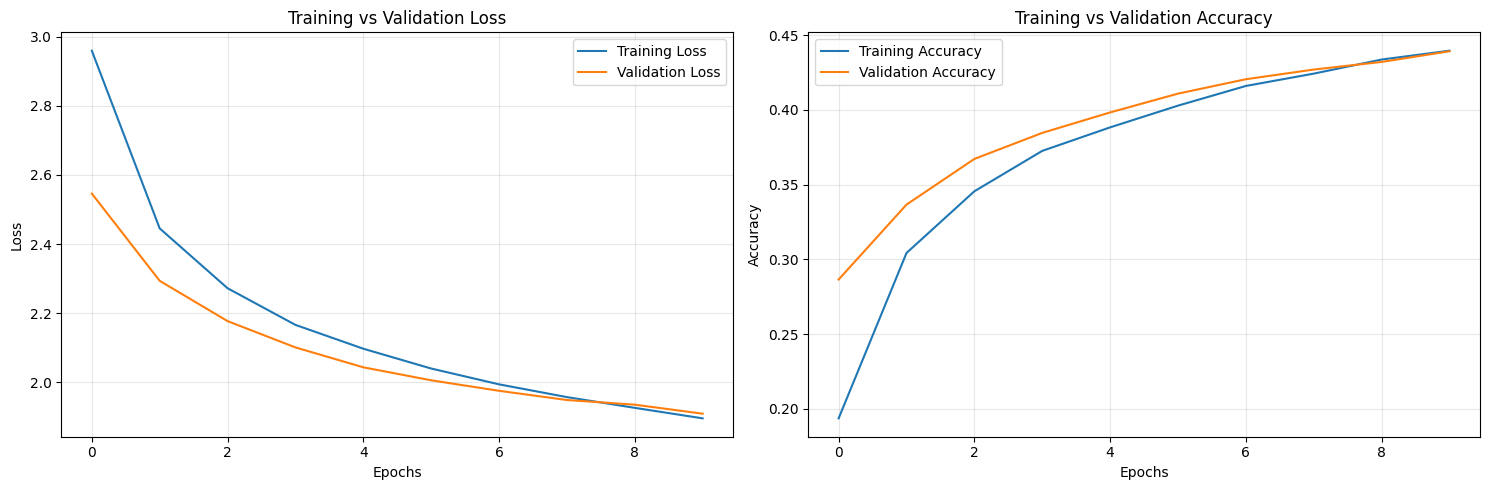

In [27]:
history_dict = history.history

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history_dict['loss'], label='Training Loss')
ax1.plot(history_dict['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training vs Validation Loss')
ax1.legend()
ax1.grid(alpha=0.3)

ax2.plot(history_dict['accuracy'], label='Training Accuracy')
ax2.plot(history_dict['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training vs Validation Accuracy')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 1.944488286972046
Test accuracy 0.42816001176834106
